In [ ]:
#WHITE NOISE
  # a special type of time series where the data doesn't follow a pattern
  # no autocorrelation = no clear relationship between past and present values
  # mean =0
  # constant variance
  # no correlation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [ ]:
raw_csv_data = pd.read_csv("Book1.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq ('b')
df_comp = df_comp.fillna(method= 'ffill')

In [ ]:
#Removing the surplus data
df_comp['market_value'] = df_comp.spx

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
#White Noise

wn = np.random.normal(loc = df_comp.market_value.mean(), scale = df_comp.market_value.std(), size = len(df_comp))
df_comp['wn'] = wn
df_comp.describe()

,market_value,wn
count,6277.000000,6277.000000
mean,1288.642547,1287.805439
std,487.868210,480.788099
min,438.920000,-491.719673
25%,992.715221,964.766578
50%,1233.761241,1286.398869
75%,1460.250000,1614.767712
max,2872.867839,2999.625243


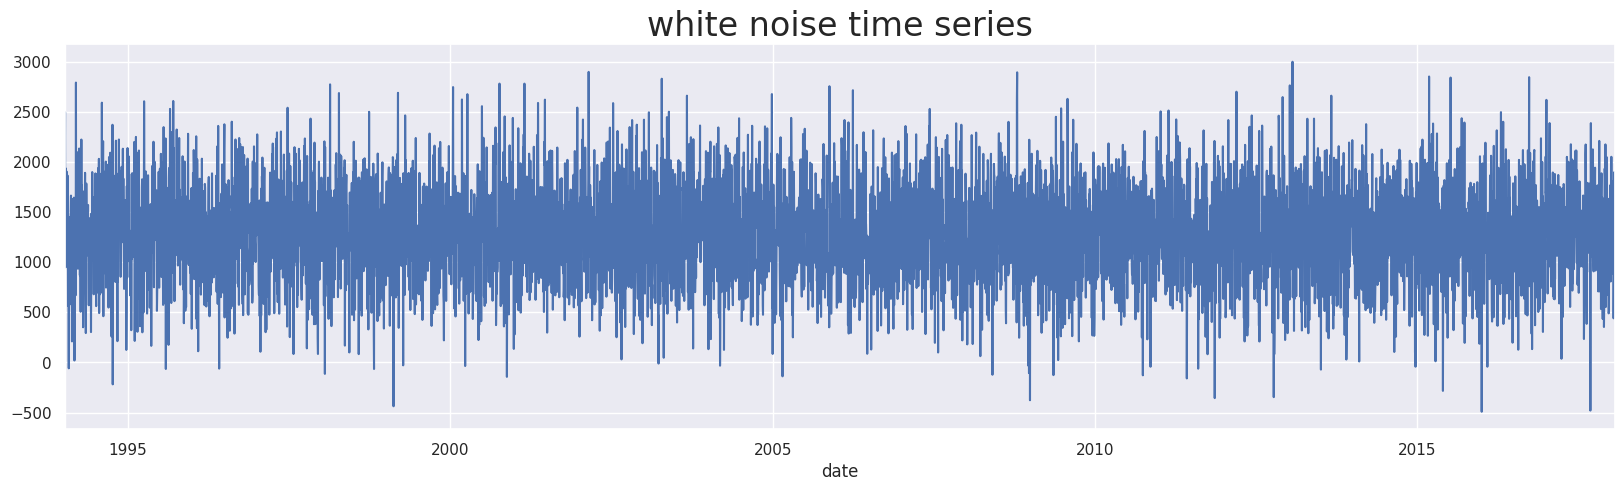

In [ ]:
df_comp.wn.plot(figsize = (20,5))
plt.title("white noise time series", size =24)
plt.show()

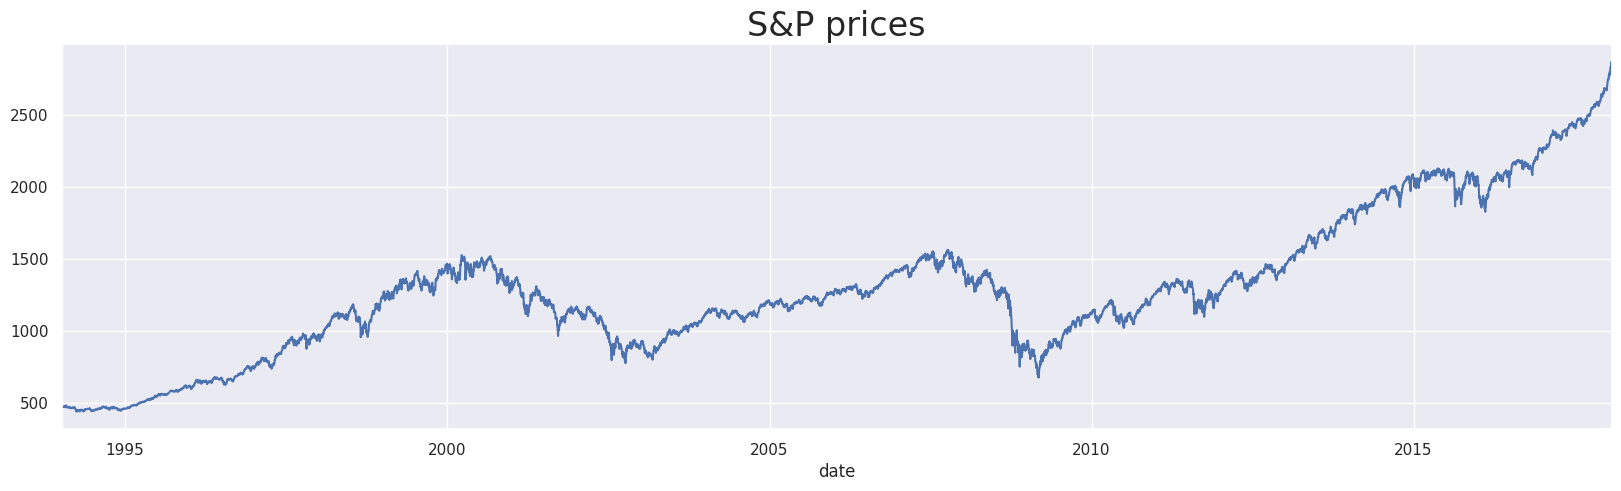

In [ ]:
df_comp.market_value.plot(figsize=(20,5))
plt.title("S&P prices", size = 24)
plt.show()

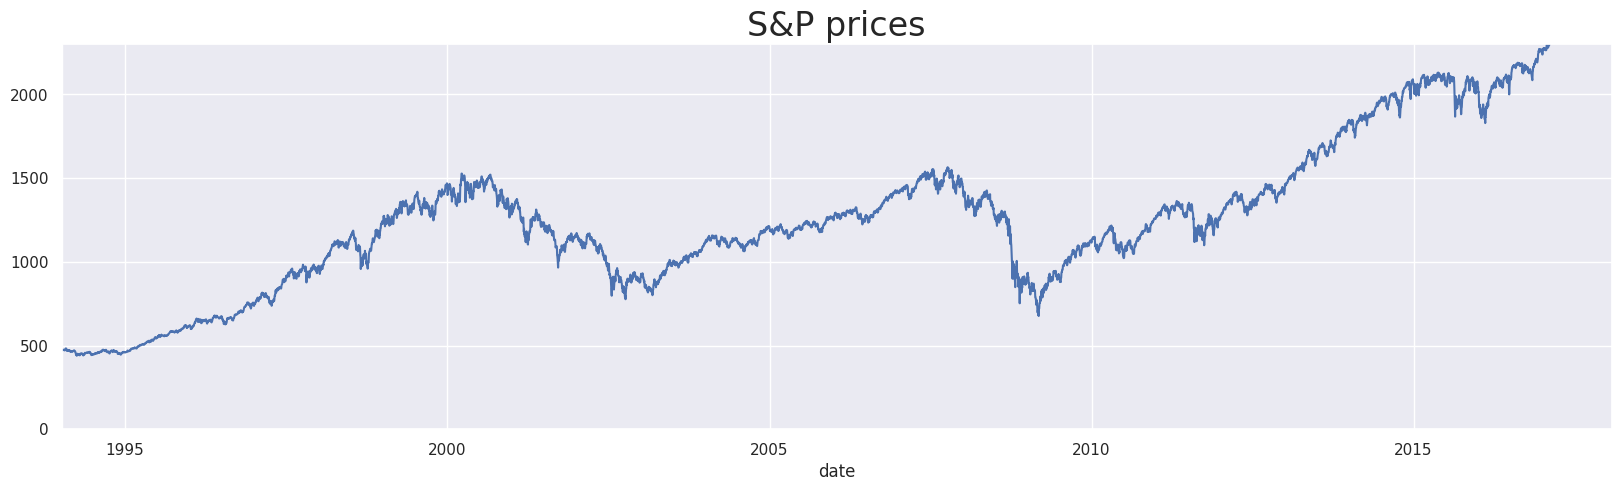

In [ ]:
df_comp.market_value.plot(figsize=(20,5))
plt.title("S&P prices", size = 24)
plt.ylim(0,2300)     # here we limited y axis by putting y limit
plt.show()

In [ ]:
rw = pd.read_csv("random walk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [ ]:
df_comp['rw'] = rw.price

In [ ]:
df_comp.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1927.172373,1122.139662
1994-01-10,475.27,2496.209141,1080.347860
1994-01-11,474.13,1058.766145,1082.095245
1994-01-12,474.17,948.085213,1083.639265
1994-01-13,472.47,1935.004128,1067.146255


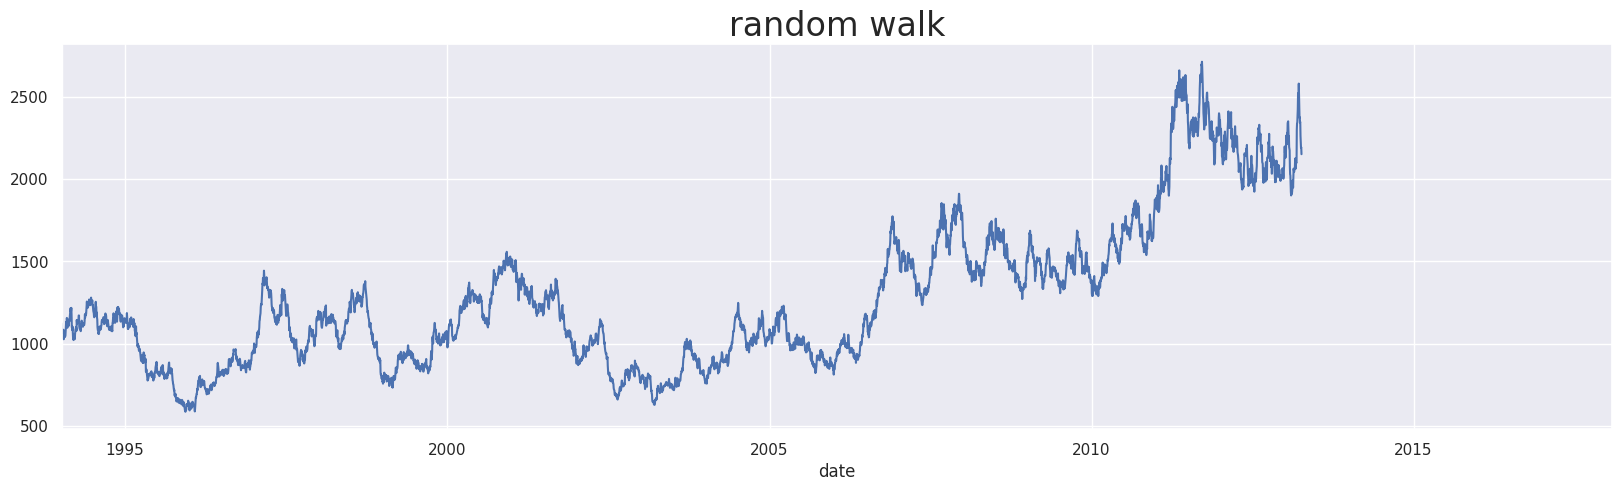

In [ ]:
df_comp.rw.plot(figsize =(20,5))
plt.title("random walk", size = 24)
plt.show()

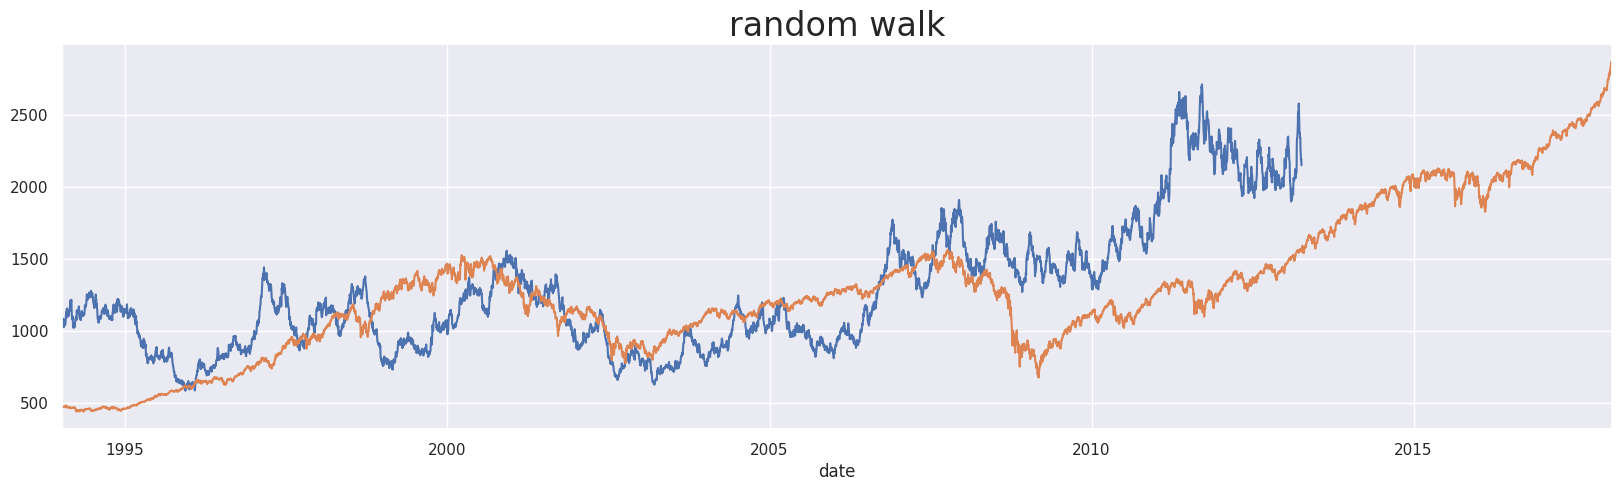

In [ ]:
df_comp.rw.plot(figsize =(20,5))
df_comp.market_value.plot()
plt.title("random walk", size = 24)
plt.show()

# small variations between consecutive time periods
# cyclical increases and decreases in short periods of time

In [ ]:
# generally people think WN = RW , but as we see from plots that it is not like that, but two are very different from each other

In [ ]:
#STATIONARITY
# cov(a) = cov(b)
# assumptions of covariance stationarity
# 1) constant mean
# 2) constant variance
# 3) consistent covariance between the periods, and identical distance from one another

# Stationarity = Covariance Stationarity
# David Dickey and Wayne Fuller test to check the stationarity and non stationarity
# Dickey-Fuller Test
# null(H0) and alternate hypothesis(H1) test
# null represents non- stationarity
# H0 : Q<1   , H1 : Q=1
# test statistic < critical value => Stationarity

In [ ]:
#Stationarity
sts.adfuller(df_comp.market_value)
# 1) t value
# 2) p value, 99.53% chance of not rejecting a norm, data is non-stationarity
# 3) no. of lags =10
# 4) no. of observations
# last line estimates the maximised information criteria provided there some appearant correlation over the values

(1.1194986381728396,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

In [ ]:
sts.adfuller(df_comp.wn)
# as white noise is a stationarity so, we also get p value as zero

(-78.10453017335054,
 0.0,
 0,
 6276,
 {'1%': -3.4313923799633836,
  '5%': -2.862000639842268,
  '10%': -2.567015195598801},
 94803.35111326698)

In [ ]:
#SEASONALITY
# certain trends will apear on cyclical basis

# Decomposition
# Split into 3 effects :
# 1) Trend = Pattern
# 2) Seasonal = Cyclical Effects
# 3) Residual = Eror of Prediction

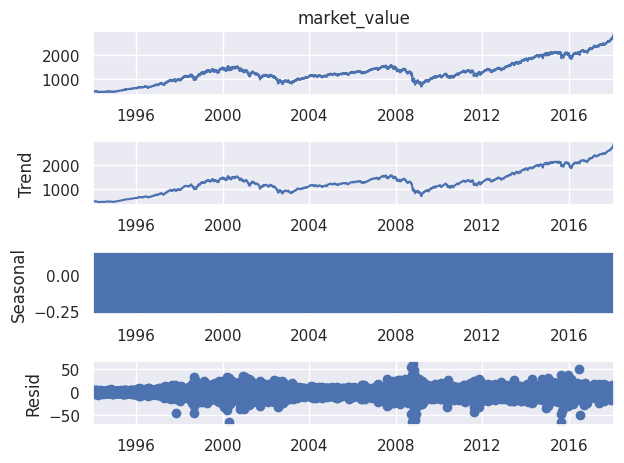

In [ ]:
#SEASONALITY
s_dec_additive = seasonal_decompose(df_comp.market_value, model = "additive")
s_dec_additive.plot()
plt.show()
# when values are constantly oscillating back and forth then seasonal graph appear rectangular
# these are values between real values and predictive values for any period

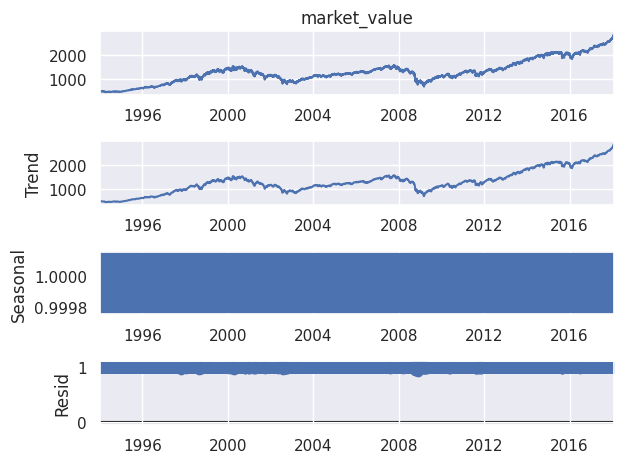

In [ ]:
s_dec_multiplicative = seasonal_decompose(df_comp.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

In [ ]:
# Correlation between Past and Present values
# Autocorrelation : The Correlation between a sequence and itself


In [ ]:
#The autocorrelation function
# ACF

Text(0.5, 1.0, 'ACF S&P')

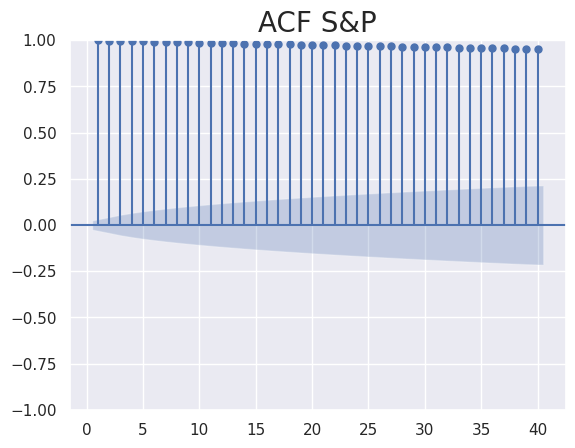

In [ ]:
sgt.plot_acf(df_comp.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 20)
# lags 40 means last 40 periods
# here we can see clearly the autocorrelation data

Text(0.5, 1.0, 'ACF wn')

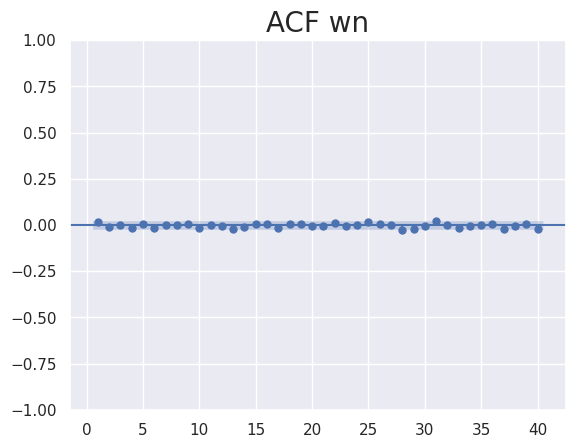

In [ ]:
sgt.plot_acf(df_comp.wn, lags = 40, zero = False)
plt.title("ACF wn", size = 20)

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Text(0.5, 1.0, 'ACF rw')

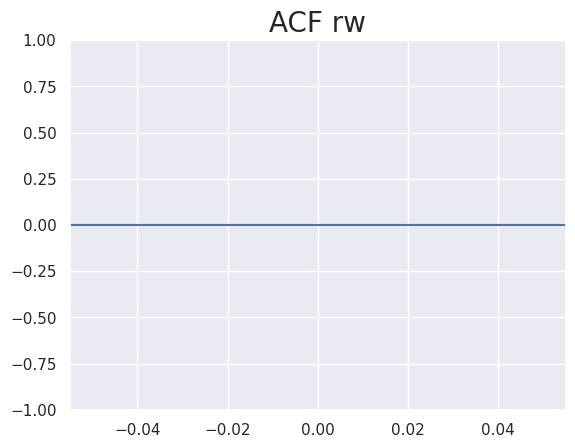

In [ ]:
sgt.plot_acf(df_comp.rw, lags = 40, zero = False)
plt.title("ACF rw", size = 20)

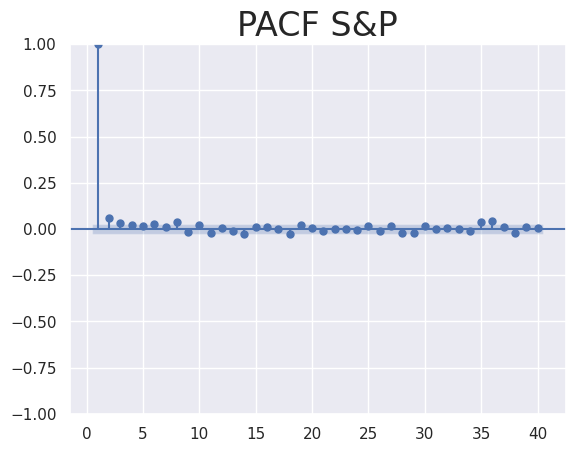

In [ ]:
# autocorrelation measure the value of time series and lagged version of itself

# PACF
sgt.plot_pacf(df_comp.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

# it cancels out all additional channels a previous period value affects the present one
# pacf only shows direct effect
# acf shows combined effect

# acf = pacf for first lag


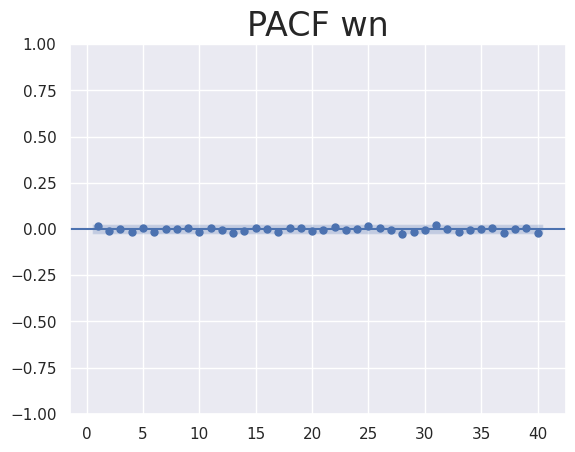

In [ ]:
sgt.plot_pacf(df_comp.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF wn", size = 24)
plt.show()

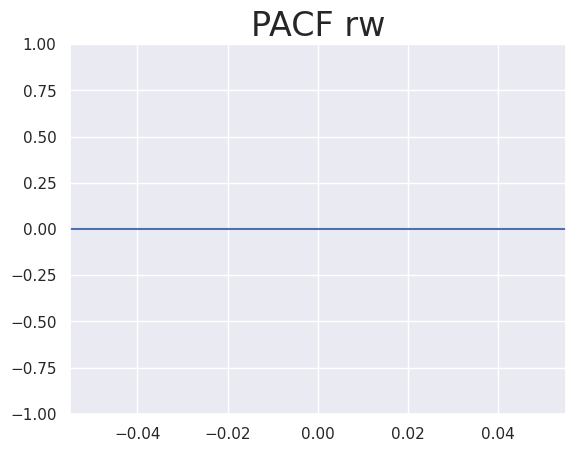

In [ ]:
sgt.plot_pacf(df_comp.rw, lags = 40, zero = False)
plt.title("PACF rw", size = 24)
plt.show()